This is a basic EDA and exploring different functions as a practice of my exploratory and visualization skills.

The main dataset is from Fitness Fitbit tracker data that I got from [Kaggle](https://www.kaggle.com/datasets/gloriarc/fitbit-fitness-tracker-data-capstone-project). 

For the most part, I explored the activity days and duration, total distance and steps, and eventually the different intensity of active minutes against calories.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
tracker = pd.read_csv('Daily_Activity_2022_27_02.csv')

In [3]:
tracker.head()

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Unnamed: 16,Unnamed: 17
0,1503960366,4/12/2016,Tue,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,NaN,Tue
1,1503960366,4/13/2016,Wed,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,NaN,Wed
2,1503960366,4/14/2016,Thu,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,Thu
3,1503960366,4/15/2016,Fri,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,NaN,Fri
4,1503960366,4/16/2016,Sat,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,NaN,Sat


In [4]:
tracker.drop(['Unnamed: 16', 'Unnamed: 17'], axis=1, inplace=True)

In [5]:
tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   ActivityDay               940 non-null    object 
 3   TotalSteps                940 non-null    int64  
 4   TotalDistance             940 non-null    float64
 5   TrackerDistance           940 non-null    float64
 6   LoggedActivitiesDistance  940 non-null    float64
 7   VeryActiveDistance        940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   LightActiveDistance       940 non-null    float64
 10  SedentaryActiveDistance   940 non-null    float64
 11  VeryActiveMinutes         940 non-null    int64  
 12  FairlyActiveMinutes       940 non-null    int64  
 13  LightlyActiveMinutes      940 non-null    int64  
 14  SedentaryM

In [6]:
tracker.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [7]:
tracker.isnull().sum()

Id                          0
ActivityDate                0
ActivityDay                 0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Days and dates

In [8]:
tracker.groupby('ActivityDate').count()['Id']

ActivityDate
4/12/2016    33
4/13/2016    33
4/14/2016    33
4/15/2016    33
4/16/2016    32
4/17/2016    32
4/18/2016    32
4/19/2016    32
4/20/2016    32
4/21/2016    32
4/22/2016    32
4/23/2016    32
4/24/2016    32
4/25/2016    32
4/26/2016    32
4/27/2016    32
4/28/2016    32
4/29/2016    32
4/30/2016    31
5/1/2016     30
5/10/2016    26
5/11/2016    24
5/12/2016    21
5/2/2016     29
5/3/2016     29
5/4/2016     29
5/5/2016     29
5/6/2016     29
5/7/2016     29
5/8/2016     27
5/9/2016     27
Name: Id, dtype: int64

In [9]:
tracker['ActivityDate'] = pd.to_datetime(tracker['ActivityDate']).dt.date

In [42]:
#To see how many days each individual was active in the given period
duration = tracker.groupby('Id').apply(lambda x: x.ActivityDate.max() - x.ActivityDate.min())
duration

Id
1503960366   30 days
1624580081   30 days
1644430081   29 days
1844505072   30 days
1927972279   30 days
2022484408   30 days
2026352035   30 days
2320127002   30 days
2347167796   17 days
2873212765   30 days
3372868164   19 days
3977333714   29 days
4020332650   30 days
4057192912    3 days
4319703577   30 days
4388161847   30 days
4445114986   30 days
4558609924   30 days
4702921684   30 days
5553957443   30 days
5577150313   29 days
6117666160   27 days
6290855005   28 days
6775888955   25 days
6962181067   30 days
7007744171   25 days
7086361926   30 days
8053475328   30 days
8253242879   18 days
8378563200   30 days
8583815059   30 days
8792009665   28 days
8877689391   30 days
dtype: timedelta64[ns]

In [13]:
numeric_cols =  [value for value in tracker.columns if (tracker[value].values.dtype == 'int64') | (tracker[value].values.dtype == 'float')]
numeric_cols

['Id',
 'TotalSteps',
 'TotalDistance',
 'TrackerDistance',
 'LoggedActivitiesDistance',
 'VeryActiveDistance',
 'ModeratelyActiveDistance',
 'LightActiveDistance',
 'SedentaryActiveDistance',
 'VeryActiveMinutes',
 'FairlyActiveMinutes',
 'LightlyActiveMinutes',
 'SedentaryMinutes',
 'Calories']

<AxesSubplot:xlabel='ActivityDay', ylabel='count'>

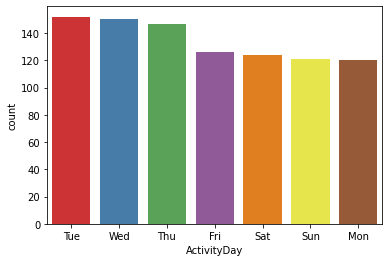

In [14]:
sns.countplot(x='ActivityDay', data=tracker, palette='Set1')

<AxesSubplot:xlabel='ActivityDay', ylabel='TotalSteps'>

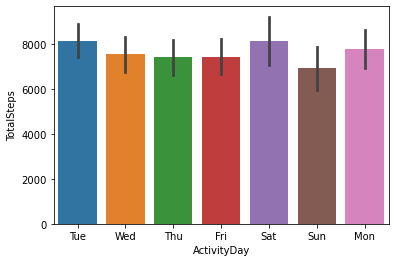

In [15]:
sns.barplot(x='ActivityDay', y='TotalSteps', data=tracker)

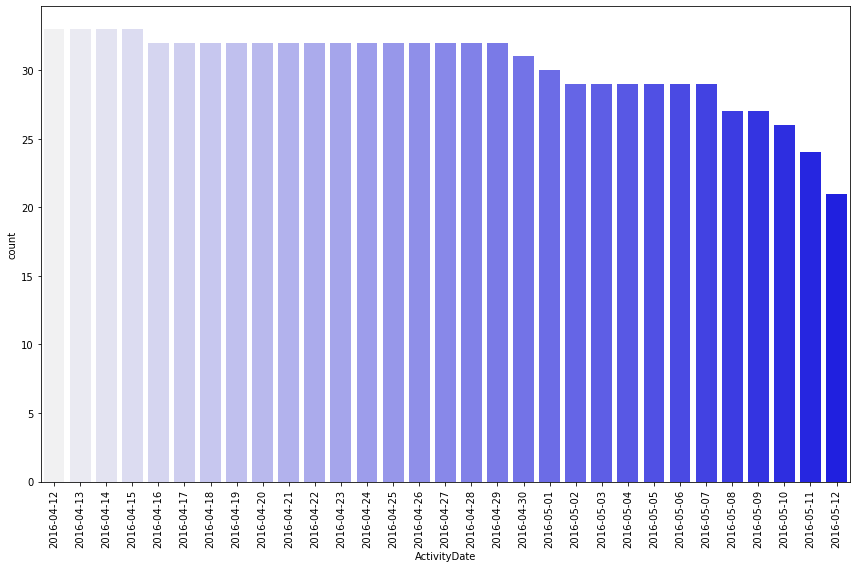

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='ActivityDate', data=tracker, palette='light:b')
plt.xticks(rotation=90)
plt.tight_layout()

In [67]:
tracker['ActivityDate'].iplot(kind='hist')

<AxesSubplot:xlabel='ActivityDay', ylabel='Calories'>

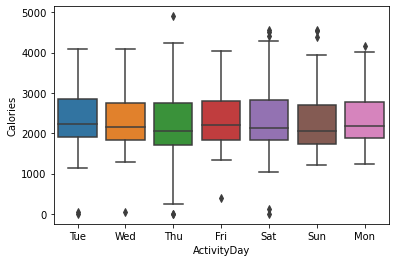

In [30]:
sns.boxplot(x='ActivityDay', y='Calories', data=tracker)

In [33]:
df = tracker.pivot_table(values='Calories', index='Id', columns='ActivityDay')

In [34]:
correlation = df.corr()
correlation

ActivityDay,Fri,Mon,Sat,Sun,Thu,Tue,Wed
ActivityDay,,,,,,,
Fri,1.000000,0.917491,0.819456,0.873223,0.914913,0.886351,0.887824
Mon,0.917491,1.000000,0.743026,0.843192,0.859099,0.941663,0.921067
Sat,0.819456,0.743026,1.000000,0.849745,0.773781,0.773385,0.802773
Sun,0.873223,0.843192,0.849745,1.000000,0.894070,0.836095,0.822712
Thu,0.914913,0.859099,0.773781,0.894070,1.000000,0.864629,0.825431
Tue,0.886351,0.941663,0.773385,0.836095,0.864629,1.000000,0.858472
Wed,0.887824,0.921067,0.802773,0.822712,0.825431,0.858472,1.000000


<AxesSubplot:xlabel='ActivityDay', ylabel='ActivityDay'>

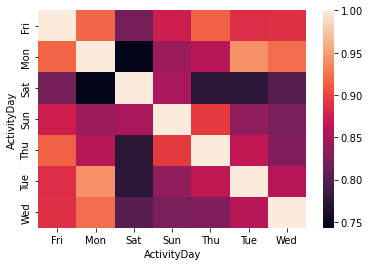

In [35]:
sns.heatmap(correlation)

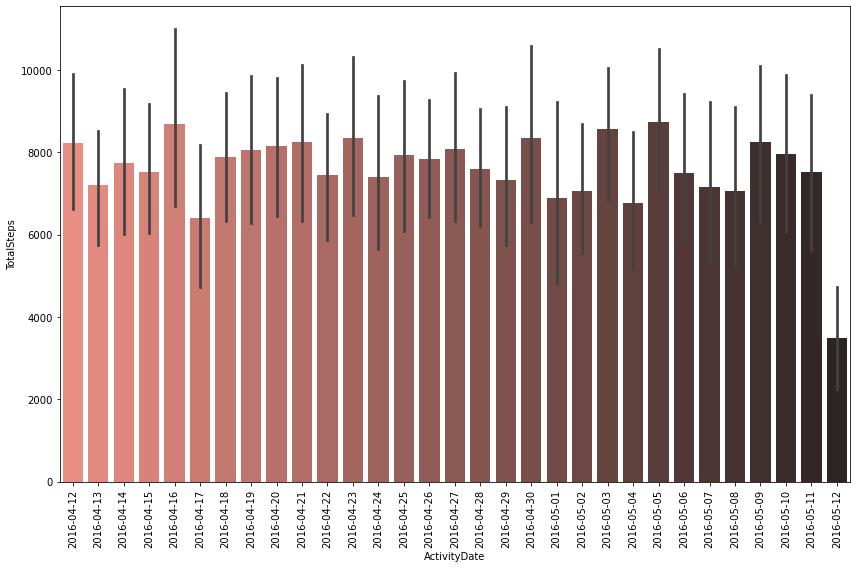

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x='ActivityDate', y='TotalSteps', data=tracker, palette='dark:salmon_r')
plt.xticks(rotation=90)
plt.tight_layout()

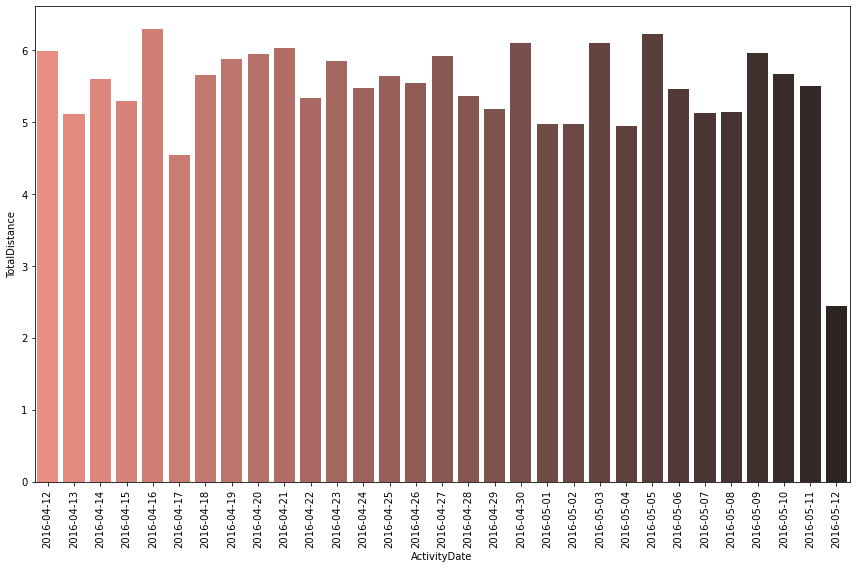

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x='ActivityDate', y='TotalDistance', data=tracker, palette='dark:salmon_r', ci=None)
plt.xticks(rotation=90)
plt.tight_layout()

<AxesSubplot:xlabel='Calories', ylabel='TotalDistance'>

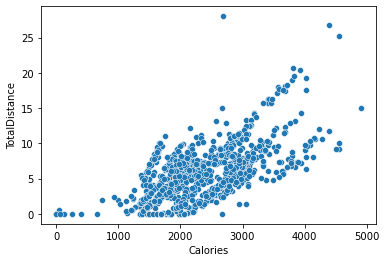

In [22]:
# Exploring the relationship between burnt calories and the total distance and then total steps taken
sns.scatterplot(x='Calories', y='TotalDistance', data=tracker)

<AxesSubplot:xlabel='Calories', ylabel='TotalSteps'>

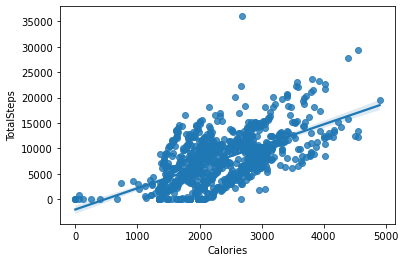

In [23]:
sns.regplot(x='Calories', y='TotalSteps', data=tracker)

Active minutes

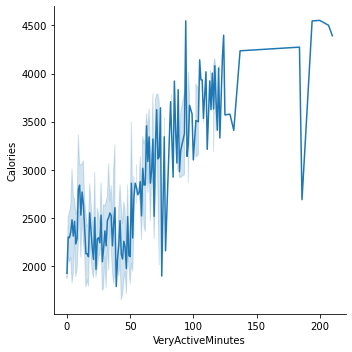

In [19]:
# Trying to explore the relationship between burnt calories and the most intense active minutes
sns.relplot(x="VeryActiveMinutes", y="Calories", kind="line", data=tracker)

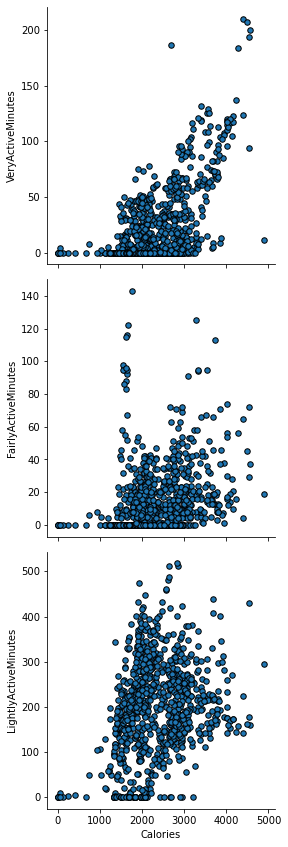

In [20]:
g = sns.PairGrid(tracker, x_vars='Calories', y_vars=['VeryActiveMinutes', 'FairlyActiveMinutes','LightlyActiveMinutes'], height=4)    
g = g.map(plt.scatter, s=30, edgecolor='black')

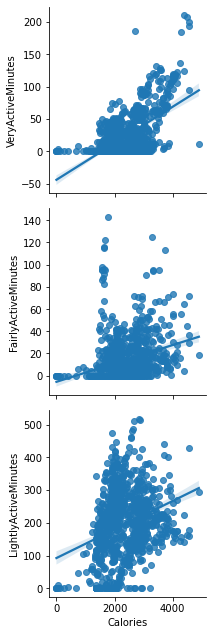

In [66]:
# Checking the association between calories burnt and the tensity (and duration) of active mivutes
g = sns.PairGrid(tracker, x_vars='Calories', y_vars=['VeryActiveMinutes', 'FairlyActiveMinutes','LightlyActiveMinutes'], height=3)    
g = g.map(sns.regplot)

In [25]:
matrix = tracker.corr()[['Calories', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].loc[['Calories', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']]
matrix

,Calories,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes
Calories,1.000000,0.615838,0.297623,0.286718
VeryActiveMinutes,0.615838,1.000000,0.312420,0.051926
FairlyActiveMinutes,0.297623,0.312420,1.000000,0.148820
LightlyActiveMinutes,0.286718,0.051926,0.148820,1.000000


<AxesSubplot:>

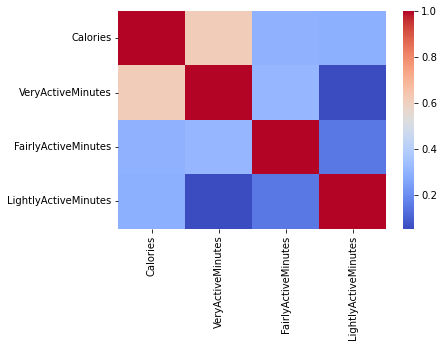

In [26]:
# Heat map of calroies against different intensity of active minutes spent
sns.heatmap(matrix, cmap='coolwarm')

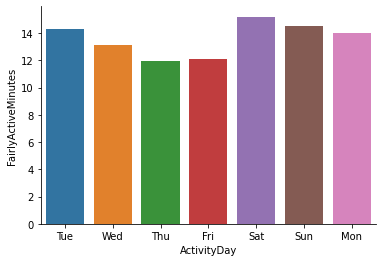

In [27]:
sns.barplot(x='ActivityDay', y='FairlyActiveMinutes', data=tracker, ci=None)
sns.despine()

In [31]:
corr = tracker.corr()

<AxesSubplot:>

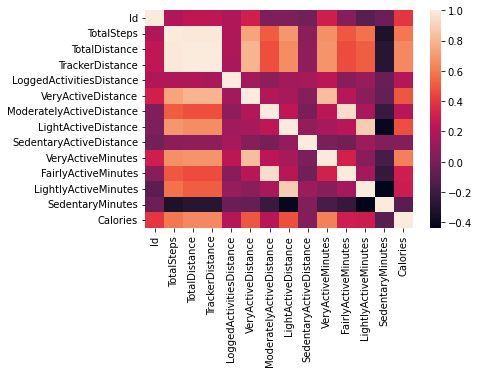

In [32]:
sns.heatmap(corr)